# Master Notebook
---
### Section 0a: Introduction - What's the "Big Idea?"
We (the group) go by `Big Ideas is AWESOME`, because it is!!!! We are group #14 in Canvas.
For a breakdown of who will be covering what:
- Aidan - Playgrounds
- Ryan - Traffic
- Tyler - Criminal Activity

We aim to answer the question "***What is the best neighborhood in Pittsburgh?***" by using data from WPRDC.

Our approach to answering this question was rather simple: we thought "*What are the most important things to consider in choosing somewhere to live, especially as a family?*" Thus, we quickly brainstormed some key points:
- Price of housing
- Schools/Education
- Wakability/Transit Options
- Recreation
- Safety

And so we found that some of the most solid sources that were on the WPRDC datbase encompassed two sections: recreation and safety. So for our sanity, we analyzed the playgrounds, traffic patterns, and criminal activity in the city of Pittsburgh. We originally wanted to consider small businesses and walkability, however we started early and did not have the code to convert census blocks into neighborhood data at the time, and thus stuck with these datasets.

Moreover, we thought from a different perspective: not what is the best neigborhood to visit, but what would be the best to live in--notably best to live in as a family if money was not a huge concern--and so our datasets stuck.

---
### Section 0b: Introduction - The Metric
Our metric is simple: it is the average of three scores from each submetric (ranging from $[0,1]$), times 100 as to make a percentage out of 100--like a grade in school. We understood going into it that a high-scoring neigborhood might be a clear winner in 2/3 categories but a loser in the third category, however it would be the easiest to interpret a numerical score out of 100 rather than be all philosophical about it... so here's our formula:

### $T = \frac{P + S + C}{3}\times 100$

- $T = $ total
- $P = $ Playground subscore *(higher score indicates more playgrounds, out of a maximum of 5)*. Uses [City of Pittsburgh Playgrounds](https://data.wprdc.org/dataset/playgrounds) by the City of Pittsburgh.
- $S = $ "Safety," or criminal activity (per 1000 residents) subscore *(higher score indicates lower crime)*. Uses [Monthly Criminal Activity](https://data.wprdc.org/dataset/monthly-criminal-activity-dashboard) by the City of Pittsburgh.
- $C = $ "Cars," or speeding activity subscore *(higher score indicates lower number of speeders, or safer drivers)*. Uses [City of Pittsburgh Traffic Count](https://data.wprdc.org/dataset/traffic-count-data-city-of-pittsburgh) by the City of Pittsburgh.

---
### Housekeeping Code

So we don't have to put this at the begining of each section, let's import Pandas, MatPlotLib, and os.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os

print("Done!")

Done!


### Section 1: Playgrounds *(Aidan)*

Let's get the playgrounds CSV. To not waste any time/space, let's also create a subset as well.

In [2]:
pg = pd.read_csv("playgrounds.csv", sep=",")
subset = pg[['name', 'neighborhood']]

print(subset.head())

                       name       neighborhood
0      Able Long Playground          Beechview
1  Albert Graham Playground   Crawford-Roberts
2         Alpine Playground  Central Northside
3          Alton Playground          Beechview
4          Ammon Playground  Bedford Dwellings


Nice! Now let's count the number of playgrounds in each neigborhood.

In [3]:
count = pg.groupby("neighborhood").size().reset_index(name = "playground_count")
count = count.sort_values("playground_count", ascending = False)
print(count.head())

           neighborhood  playground_count
56  Squirrel Hill South                 8
4             Beechview                 5
52    South Side Slopes                 5
0      Allegheny Center                 4
29        Highland Park                 4


Next up is plotting out this data on a graph. The first graph is only the top 10; the second is for all of the neigborhoods.

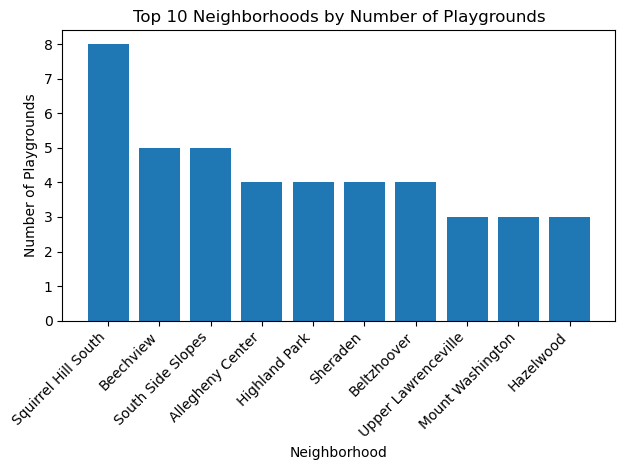

In [4]:
top10 = count.head(10)

plt.bar(top10["neighborhood"], top10["playground_count"])
plt.xticks(rotation = 45, ha = "right")
plt.xlabel("Neighborhood")
plt.ylabel("Number of Playgrounds")
plt.title("Top 10 Neighborhoods by Number of Playgrounds")
plt.tight_layout()
plt.show()

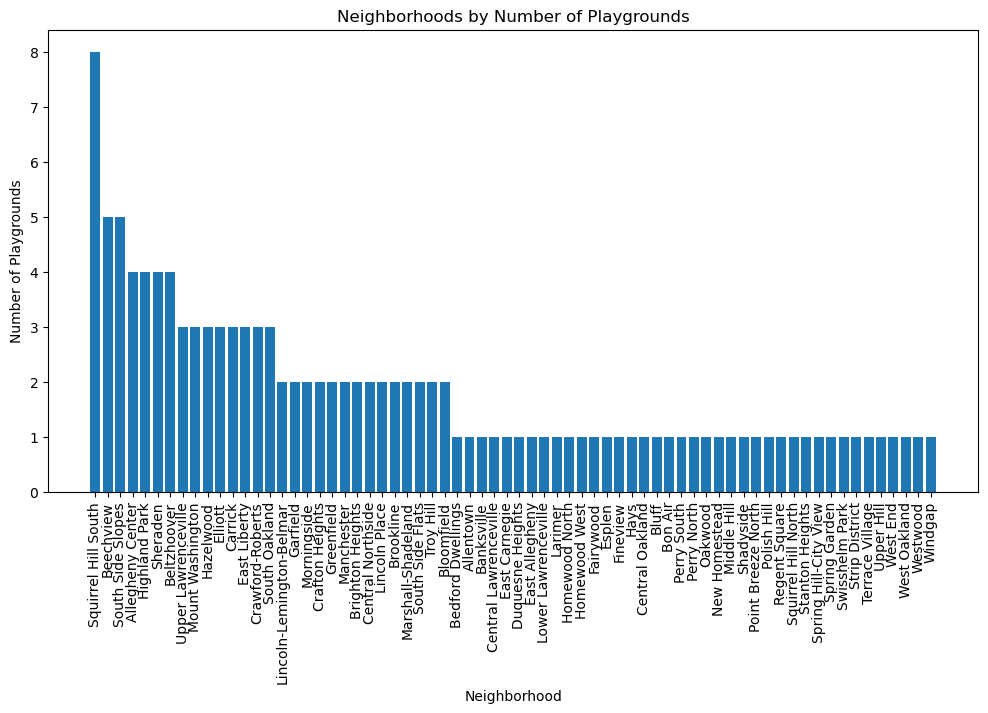

In [5]:
plt.figure(figsize=(12,6))
plt.bar(count["neighborhood"], count["playground_count"])
plt.xlabel("Neighborhood")
plt.ylabel("Number of Playgrounds")
plt.title("Neighborhoods by Number of Playgrounds")
plt.xticks(rotation=90)
plt.show()

Let's confirm these numbers. Using [Google My Maps](https://www.google.com/maps/d/u/1/edit?mid=1uZje1pOzDm_lGC8x7sGFMyuYCmEjzRo&usp=sharing), we plotted out all of the playgrounds on Google Maps to create a visual of the all the Pittsburgh playgrounds, but specifically the ones in Squirrel Hill South. The crossed out pins are within the boundaries of other neighborhoods.

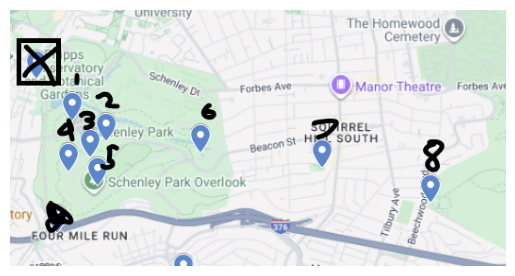

In [6]:
img = mpimg.imread("lies.png")
plt.imshow(img)
plt.axis("off")
plt.show()

Although Schenley Park is technically a part of Squirrel Hill South, nobody lives in Schenley and thus is not truly a part of the community, and thus the six parks which are within it are excluded from the total. This leaves the following as the winners, with a score being calculated out of a total of 5 parks.

In [7]:
pg_scores = count.copy()

count["score"] = count["playground_count"] / 5
count.loc[count["neighborhood"] == "Squirrel Hill South", "score"] = 2/5 #Squirrel Hill has a specifically assigned score as reasoned above.
count = count.sort_values("score", ascending=False)
print(count.head(10))

pg_scores = count

           neighborhood  playground_count  score
4             Beechview                 5    1.0
52    South Side Slopes                 5    1.0
0      Allegheny Center                 4    0.8
29        Highland Park                 4    0.8
5           Beltzhoover                 4    0.8
49             Sheraden                 4    0.8
20         East Liberty                 3    0.6
63  Upper Lawrenceville                 3    0.6
40     Mount Washington                 3    0.6
28            Hazelwood                 3    0.6


#### The winners of this section are a tie: both **Beechview** and **South Side Slopes** have 5 playgrounds!

### Section 2: Traffic *(Ryan)*

Let's read the data file, and isolate the metrics we'll be using - speed limits, average speed, and percent of speeding drivers in each neighborhood. We'll average out the first two when a neighborhood has multiple data points.

In [8]:
# Isolating the data we'll use to determine which neighboorhood has the best traffic - average speed limit, average speed, and % of drivers speeding.
traffic = pd.read_csv('traffic-count-data.csv')
traffic = traffic[['neighborhood','speed_limit','median_speed','percent_over_limit', 'average_daily_car_traffic']].copy()
traffic['pol'] = traffic['percent_over_limit'] * traffic['average_daily_car_traffic']
traffic = traffic.groupby('neighborhood').agg({'speed_limit': 'mean','median_speed': 'mean','pol' : 'sum', 'average_daily_car_traffic' : 'sum'}).round(3).dropna()
traffic['percent_over_limit'] = (traffic['pol'] / traffic['average_daily_car_traffic']).round(3)
traffic = traffic[['speed_limit','median_speed','percent_over_limit']]
print(traffic.head())

                  speed_limit  median_speed  percent_over_limit
neighborhood                                                   
Allegheny Center       25.000        27.000              65.000
Allegheny West         25.000        20.000              11.000
Arlington              25.000        26.500              61.191
Beechview              25.000        26.667              68.926
Bloomfield             27.727        22.467              21.270


Now that we have the average speed and speed limit per neighborhood, we can do some math to see how far off of the speed limit the average driver drove at, and turn that into a score from 100-0. We'll do the same for the percent of speeding drivers.

In [9]:
# Turning average speed limit and average speed into a score from 0-100, based on what % of the speed limit the average driver is driving at.
traffic['speed_ratio'] = traffic['median_speed'] / traffic['speed_limit']
traffic['percent_diff'] = (abs(((traffic['speed_ratio'] * 100)) - 100).round(3).astype(str))
traffic['speed_score'] = 100 - traffic['percent_diff'].astype(float)

# Turning % of drivers speeding into a score from 0-100, based on how low the % is.
traffic['speeding_score'] = abs(100 - traffic['percent_over_limit'])
print(traffic.head())

                  speed_limit  median_speed  percent_over_limit  speed_ratio  \
neighborhood                                                                   
Allegheny Center       25.000        27.000              65.000     1.080000   
Allegheny West         25.000        20.000              11.000     0.800000   
Arlington              25.000        26.500              61.191     1.060000   
Beechview              25.000        26.667              68.926     1.066680   
Bloomfield             27.727        22.467              21.270     0.810293   

                 percent_diff  speed_score  speeding_score  
neighborhood                                                
Allegheny Center          8.0       92.000          35.000  
Allegheny West           20.0       80.000          89.000  
Arlington                 6.0       94.000          38.809  
Beechview               6.668       93.332          31.074  
Bloomfield             18.971       81.029          78.730  


Next, we'll combine our two scores into a combined final score to determine how good each neighborhood's drivers are.

In [10]:
# Finding the combined scores
traffic['combined_score'] = ((traffic['speed_score'] + traffic['speeding_score'])/2).round(3)
traffic = traffic[['speed_score', 'speeding_score', 'combined_score']]
print(traffic.head())

                  speed_score  speeding_score  combined_score
neighborhood                                                 
Allegheny Center       92.000          35.000          63.500
Allegheny West         80.000          89.000          84.500
Arlington              94.000          38.809          66.404
Beechview              93.332          31.074          62.203
Bloomfield             81.029          78.730          79.880


Finally, we can sort and display this combined score to see which 10 neighborhoods have the best drivers.

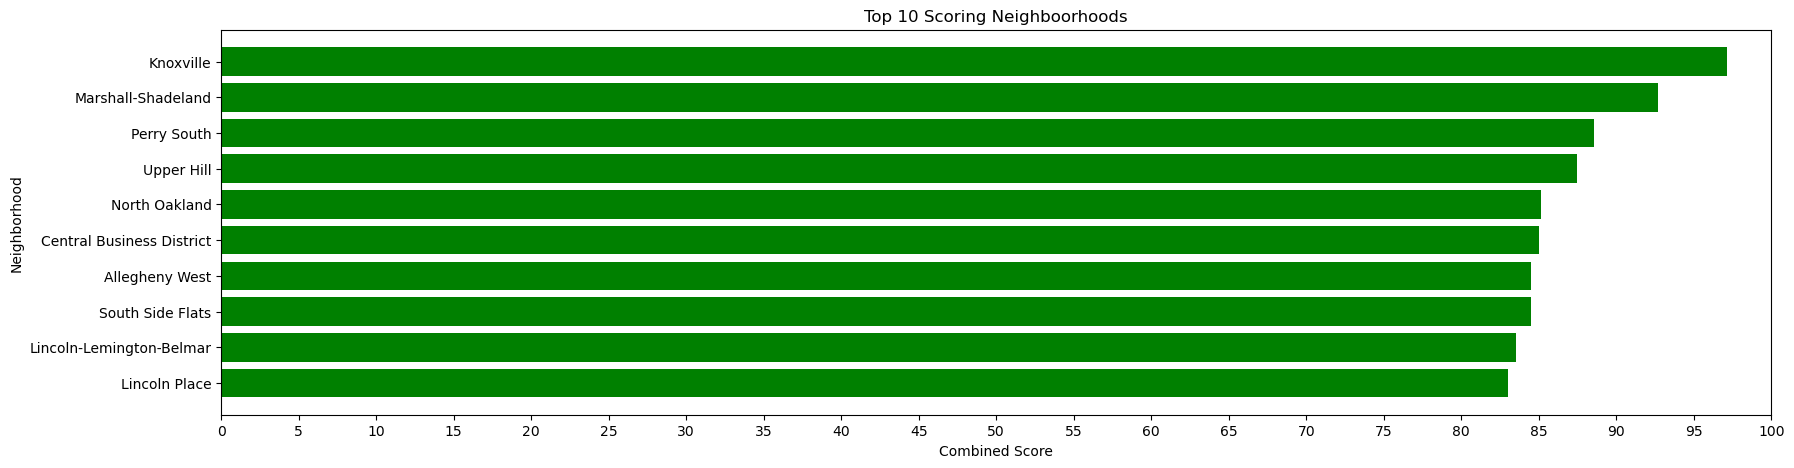

In [11]:
# Displaying the 10 best combined scores
scoreSortedDesc = traffic.sort_values(by='combined_score', ascending=False).reset_index()
topTenScore = scoreSortedDesc.head(10)

plt.figure(figsize=(20,5))
plt.barh(topTenScore["neighborhood"], topTenScore["combined_score"], color='green')
plt.ylabel("Neighborhood")
plt.xlabel("Combined Score")
plt.title("Top 10 Scoring Neighboorhoods")
plt.xlim(0,100)
plt.xticks(range(0, 101, 5))
plt.gca().invert_yaxis()
plt.show()

As well as every neighborhood's combined driving score.

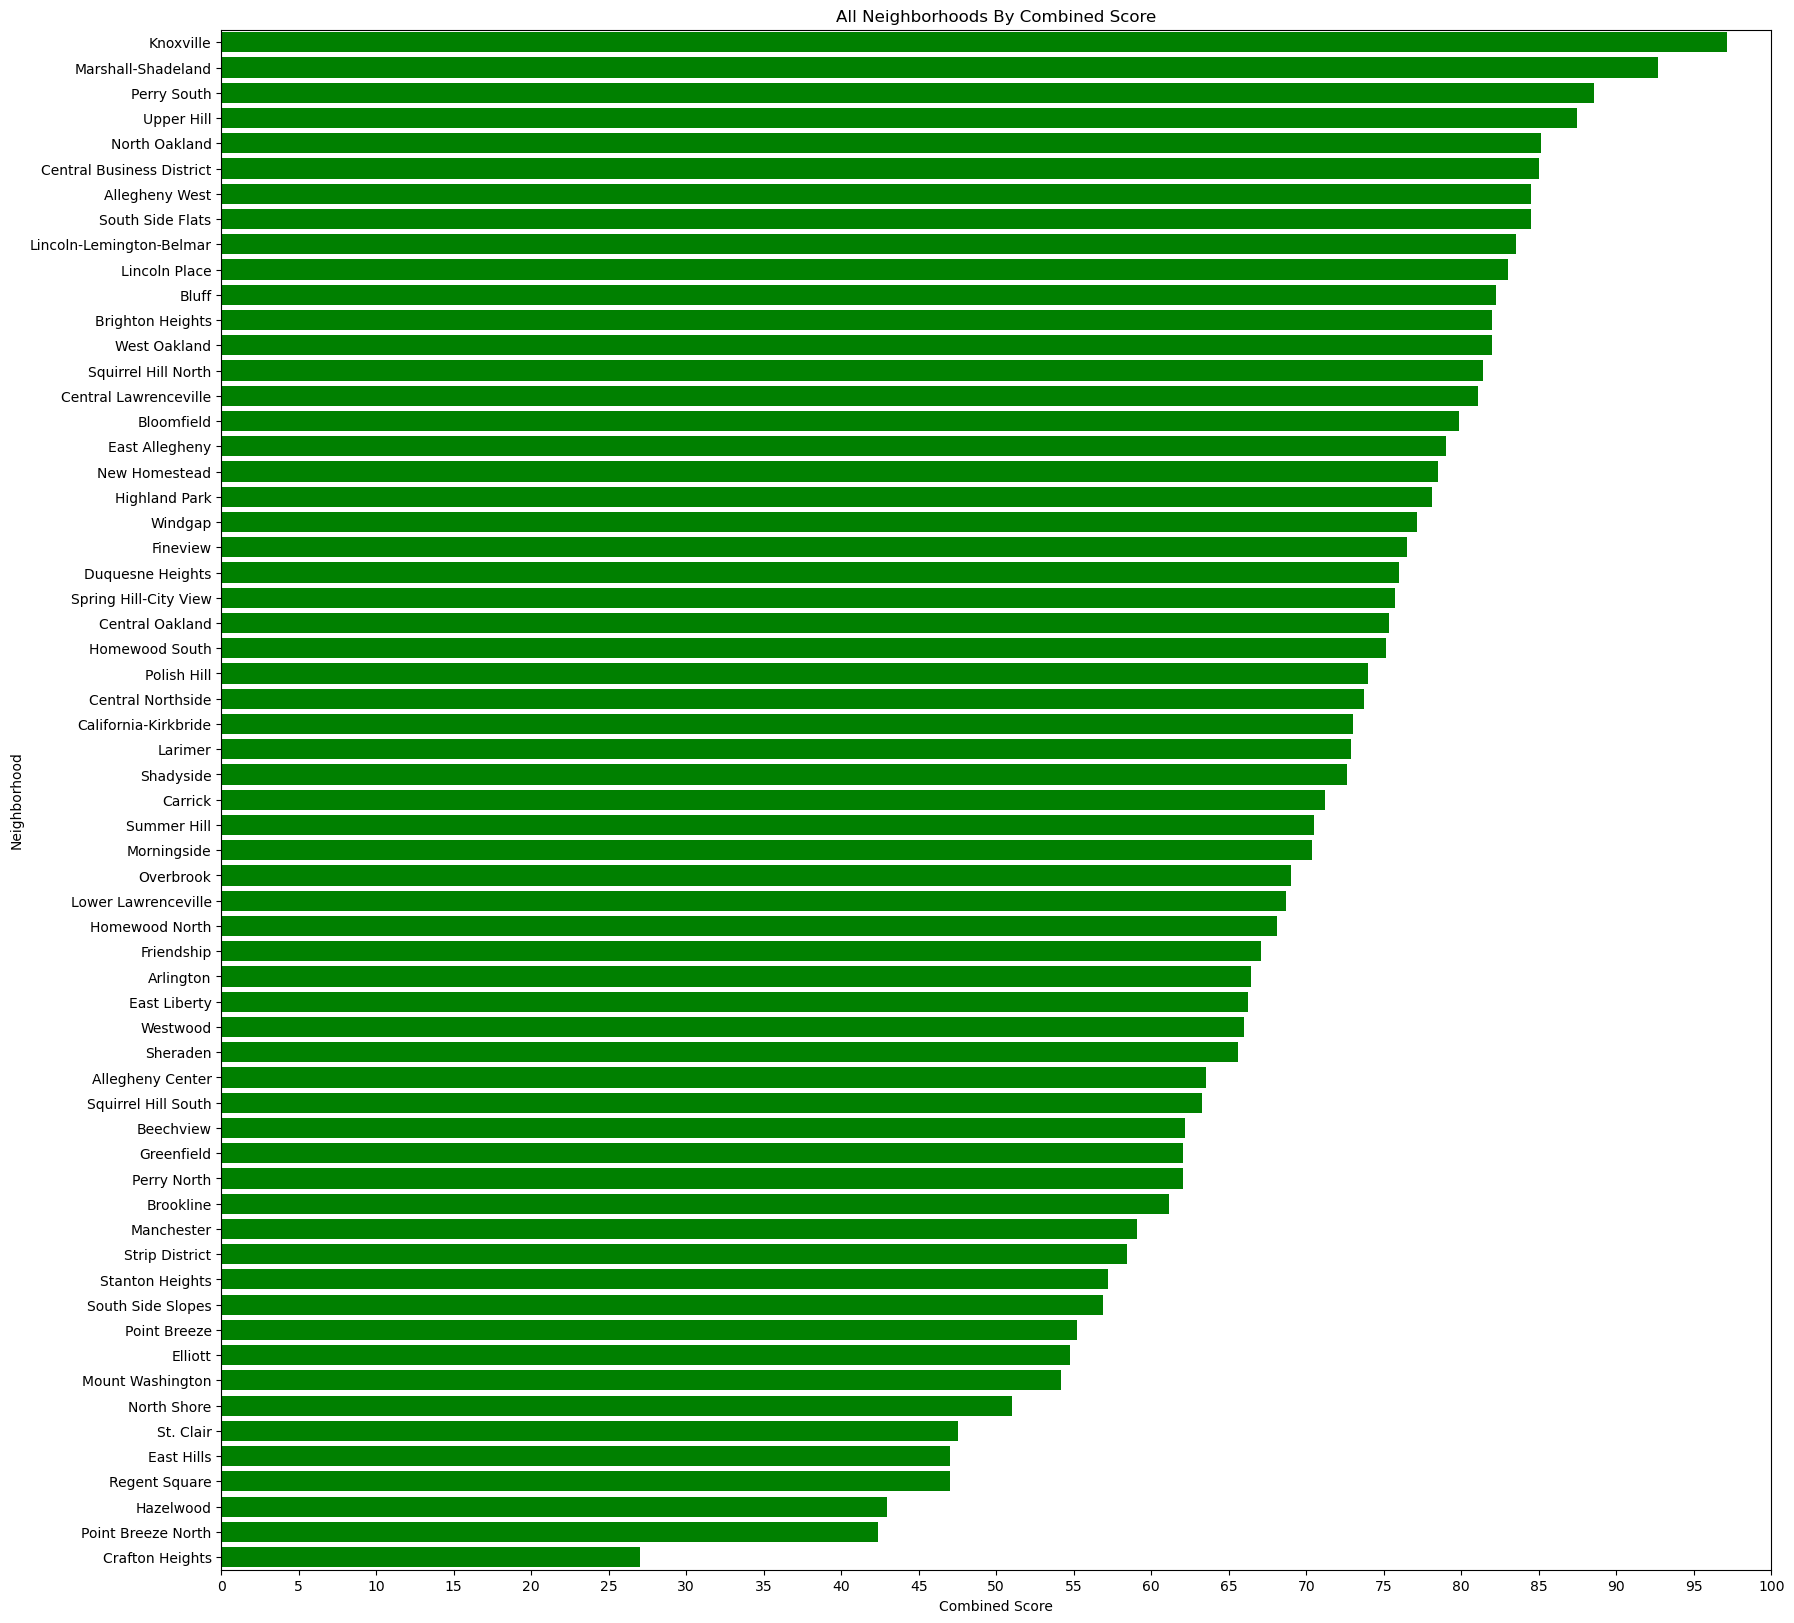

                 neighborhood  traffic_scores
27                  Knoxville         0.97138
33         Marshall-Shadeland         0.92665
41                Perry South         0.88550
57                 Upper Hill         0.87435
37              North Oakland         0.85172
10  Central Business District         0.85000
1              Allegheny West         0.84500
48           South Side Flats         0.84500
30   Lincoln-Lemington-Belmar         0.83500
29              Lincoln Place         0.83000


In [12]:
# Displaying all combined scores
scoreSortedDesc = traffic.sort_values(by='combined_score', ascending=False).reset_index()

plt.figure(figsize=(20,20))
plt.barh(scoreSortedDesc["neighborhood"], scoreSortedDesc["combined_score"], color='green')
plt.ylabel("Neighborhood")
plt.xlabel("Combined Score")
plt.title("All Neighborhoods By Combined Score")
plt.xlim(0,100)
plt.xticks(range(0, 101, 5))
plt.ylim(-0.5, len(scoreSortedDesc) - 0.5)
plt.gca().invert_yaxis()
plt.show()

tf_scores = traffic.copy()[['combined_score']]
tf_scores['traffic_scores'] = tf_scores['combined_score'] / 100
tf_scores = tf_scores[['traffic_scores']].reset_index()
print(tf_scores.sort_values(by='traffic_scores', ascending=False).head(10))

#### The winner of this section--the one with the safest drivers--is **Knoxville**, beating out Marshall-Shadeland by a pretty big margin!

### Section 3: Safety *(Tyler)*

First, lett us create a variable to hold the contents of the Crime Activity file.

In [13]:
crime = pd.read_csv("CrimeActivity.csv", sep = ',', low_memory=False)

Unfortunately, some of the names of the neighborhoods weren't standardized across multiple data sets. Let's fix that by linking the names that caused issues to the same name, allowing the names to be corrected.

In [14]:
crime['Neighborhood'] = crime['Neighborhood'].replace({'Lincoln-Lemington-Belmar': 'Lincoln–Lemington–Belmar', 'Arlington': 'Arlington - Arlington Heights (Combined)',
    'Arlington Heights': 'Arlington - Arlington Heights (Combined)'})

Now let's count the number of crime reports in each neighborhood and print some of the results.

In [15]:
crime_counts = crime['Neighborhood'].value_counts().reset_index()
crime_counts.columns = ['Neighborhood', 'CrimeReports']

print(crime_counts)

                 Neighborhood  CrimeReports
0   Central Business District          7218
1            South Side Flats          4631
2                     Carrick          2242
3                   Shadyside          1993
4              East Allegheny          1917
..                        ...           ...
84             Swisshelm Park            66
85              New Homestead            54
86                  Chartiers            38
87                  Ridgemont            33
88                Saint Clair            25

[89 rows x 2 columns]


These are interesting results, but they don't tell the full story. Some neighborhoods have a higher population, naturally resulting in higher crime reports than those with lower populations. To fix this we can use our population dataset to standardize the crime reports.

In [16]:
population = pd.read_csv("Population.csv")

merged_df = crime_counts.merge(population[['Neighborhood', '2020_Total_Population']],
                               on='Neighborhood', how='left')

#print(merged_df)

This calculation is used to determine the amount of crime reports per 1000 residents, resulting in a more accurate representation of crime.

In [17]:
merged_df['CrimePer1000'] = merged_df['CrimeReports'] / merged_df['2020_Total_Population'] * 1000
#print(merged_df)

Now let us create a graph to represent this data.

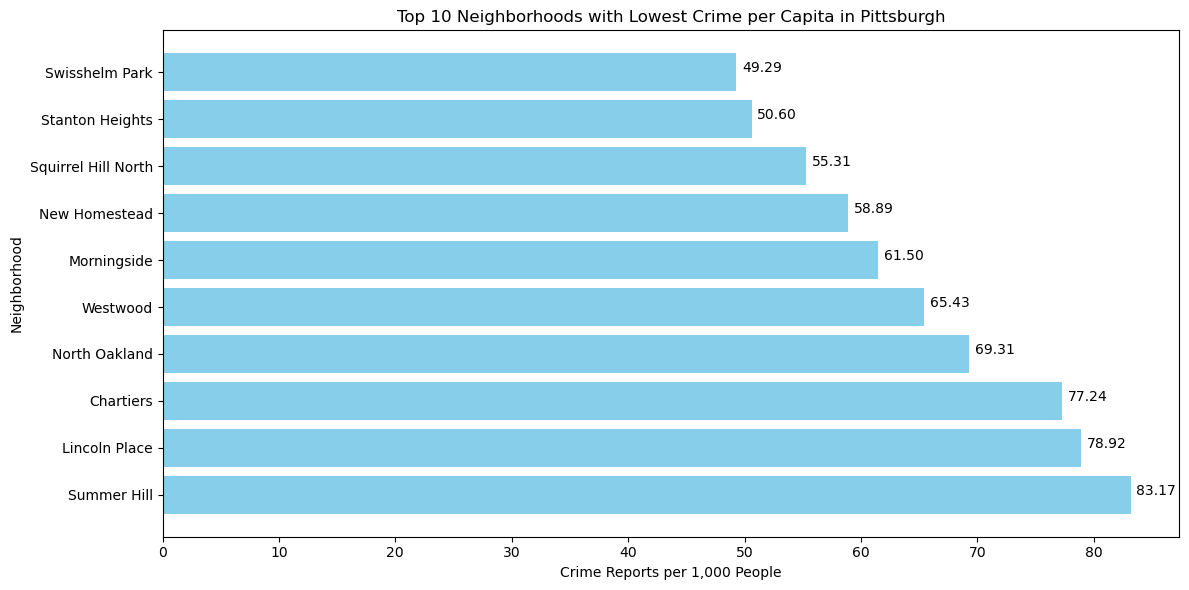

In [18]:
lowest_10 = merged_df.sort_values('CrimePer1000').head(10)

plt.figure(figsize=(12,6))
plt.barh(
    lowest_10['Neighborhood'], 
    lowest_10['CrimePer1000'], 
    color='skyblue'
)

plt.xlabel('Crime Reports per 1,000 People')
plt.ylabel('Neighborhood')
plt.title('Top 10 Neighborhoods with Lowest Crime per Capita in Pittsburgh')
plt.gca().invert_yaxis()  # Invert y-axis to have the lowest on top

for index, value in enumerate(lowest_10['CrimePer1000']):
    plt.text(value + 0.5, index, f'{value:.2f}')

plt.tight_layout()
plt.show()
#print(lowest_10[['Neighborhood', 'CrimeReports', '2020_Total_Population', 'CrimePer1000']])

Now that we have our neighborhoods ranked by crime reports, we can derive a score for each to be used in our final calculation for the winner. This can be done using a percentile score, with the neighborhood with the lowest crime per 1000 having the highest score and the neighborhood with the highest crime per 1000 having the lower score.

In [19]:
merged_df['crime_scores'] = 1 - merged_df['CrimePer1000'].rank(method='average', pct=True)
pd.set_option('display.max_rows', None)
pd.set_option('display.width', 200)
print(merged_df[['Neighborhood', 'CrimePer1000', 'crime_scores']].sort_values('crime_scores', ascending=False).head(10))

crime_scores = merged_df.copy()

           Neighborhood  CrimePer1000  crime_scores
84       Swisshelm Park     49.290515      0.988764
67      Stanton Heights     50.598600      0.977528
33  Squirrel Hill North     55.307686      0.966292
85        New Homestead     58.887677      0.955056
70          Morningside     61.500615      0.943820
68             Westwood     65.426170      0.932584
29        North Oakland     69.310635      0.921348
86            Chartiers     77.235772      0.910112
62        Lincoln Place     78.922345      0.898876
81          Summer Hill     83.166333      0.887640


#### The winner of this section--the one with the lowest criminal activity per 1000 residents--is **Swisshelm Park**!

### Section 4: Crowning a Winner

Once again, the total score (and thus winner) is determined by the mean of the three subscores, times 100 lead to a score (like a grade) out of 100. Below is code that produces the top 5 winners by total score.

In [21]:
crime_scores = crime_scores.rename(columns={"Neighborhood": "neighborhood"})
pg_scores = pg_scores.rename(columns={"score": "P"})
crime_scores = crime_scores.rename(columns={"crime_scores": "S"})
tf_scores = tf_scores.rename(columns={"traffic_scores": "C"})
#normalizing column names for the purpose of calculating a mean.

merged = (
    pg_scores[["neighborhood", "P"]]
        .merge(crime_scores[["neighborhood", "S"]], on="neighborhood")
        .merge(tf_scores[["neighborhood", "C"]], on="neighborhood")
)

merged["T"] = ((merged["P"] + merged["S"] + merged["C"]) / 3) * 100
merged = merged.sort_values(by="T", ascending=False)

print(merged.head(5))

         neighborhood    P         S        C          T
0           Beechview  1.0  0.764045  0.62203  79.535831
3       Highland Park  0.8  0.752809  0.78122  77.800966
17      Lincoln Place  0.4  0.898876  0.83000  70.962547
1   South Side Slopes  1.0  0.505618  0.56899  69.153599
11        Morningside  0.4  0.943820  0.70340  68.240674


# So according to our research, analysis, and our specific metric, **Beechview** is the winner!

As was mentioned earlier, there is a practically infinite amount of information that we *did not* consider in our analysis, and thus, considering a 100% definitive winner would be silly. However, for our metric specifically--being what is the best neighborhood for a family to live in, ignoring costs--Beechview is the winner.